# Kissipo-DNN-Mnist
MNIST 手寫數字辨識
![Mnist](https://camo.githubusercontent.com/01c057a753e92a9bc70b8c45d62b295431851c09cffadf53106fc0aea7e2843f/687474703a2f2f692e7974696d672e636f6d2f76692f3051493378675875422d512f687164656661756c742e6a7067)

##  載入TF2.0所需的函數庫


In [1]:
import tensorflow as tf
print(tf.__version__)

2.5.0


# Part-1 The training phase

## IPO-M: Building a DL model (Sequential API, Graph mode)
$M(x)=\hat{y}$

In [12]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

## IPO-I: input data

### 載入MNIST數據集。

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [27]:
type(x_train)

numpy.ndarray

In [15]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


## IPO-O: ontput data

In [16]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


## IPO-P: Training model

###  選擇一個優化器和損失函數進行模型建構
The from_logits=True attribute inform the loss function that the output values generated by the model are not normalized, a.k.a. logits. In other words, the softmax function has not been applied on them to produce a probability distribution.

In [8]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [9]:
#Create an optimizer with the desired parameters.
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

### Compile model

In [13]:
model.compile(optimizer=opt, loss=loss_fn, metrics=['accuracy'])

##  進行模型訓練

In [14]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3321 - accuracy: 0.9028
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1733 - accuracy: 0.9487
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1329 - accuracy: 0.9608
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1102 - accuracy: 0.9671
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0957 - accuracy: 0.9713
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0862 - accuracy: 0.9737
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0792 - accuracy: 0.9761
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0703 - accuracy: 0.9788
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0654 - accuracy: 0.9799
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.060

## IPO-P: Evaluating model (模型評估)

In [17]:
model.evaluate(x_test,  y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0670 - accuracy: 0.9780


[0.06702364236116409, 0.9779999852180481]

In [20]:
import numpy as np
from PIL import Image
from IPython.display import display

# Part-2 The Inference phase

## IPO-M: Predicting the digit of an image
$M(x)=\hat{y}$

## IPO-I2: input a single image

### 第一次

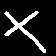

In [25]:
#show image real size
img = Image.open('n1.bmp')
display(img)
img2=img.resize((28, 28))
img.close()

In [26]:
#show image at the size of 28x28
display(img2)

### Covert an image to a numpy.ndarray (1, 28, 28)

In [28]:
im2arr = np.array(img2)/ 255.0
im2arr = im2arr.reshape(1,28,28)

## IPO-P2: model.predict

In [30]:
y_pred = model.predict(im2arr)
print(y_pred)


[[-4.675992   1.6544809  2.3511271 -0.2650715  2.3503754  2.11201
  -2.514217  -1.821907   1.8603271  0.5323373]]


In [31]:
y_hat =np.argmax(y_pred)
y_hat

2